# Importing the libraries needed for the project

In [1]:
# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras_preprocessing import image
import tensorflow.keras.layers as layers


# Sklearn model performance utils
from sklearn.metrics import roc_curve, plot_roc_curve, auc 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score

# Misc libraries for other tasks 
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# used to prepare the image directory and split into train , validate , test for keras
# import splitfolders

## loading the images into a tensor flow dataframe object 

In [2]:
# Split with a ratio only done once per project directory 
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

#image_folder = Path('/food_data/images')

#output_folder = Path('/food_data/output')

#splitfolders.ratio(image_folder, output=output_folder,
    #seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

## Creating the traning and test dataframes using keras 


In [4]:
# creatnig the training, testing and validation 
train_df = image_dataset_from_directory(
    directory = '../Jay-branch/food_data/output/train',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100),
    
    
    )

test_df = image_dataset_from_directory(
    directory = '../Jay-branch/food_data/output/test',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100)
    )

val_df = image_dataset_from_directory(
    directory = '../Jay-branch/food_data/output/val',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100)
    )


Found 91237 files belonging to 148 classes.


2022-04-09 18:39:09.066348: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 11415 files belonging to 148 classes.
Found 11358 files belonging to 148 classes.


In [7]:
labels_148 = test_df.class_names
labels_148_df = pd.DataFrame(labels_148)
labels_148_df.columns =['ingredient']
labels_148_df
labels_148_df.to_csv('labels_148.csv')

## Visualizing the data 


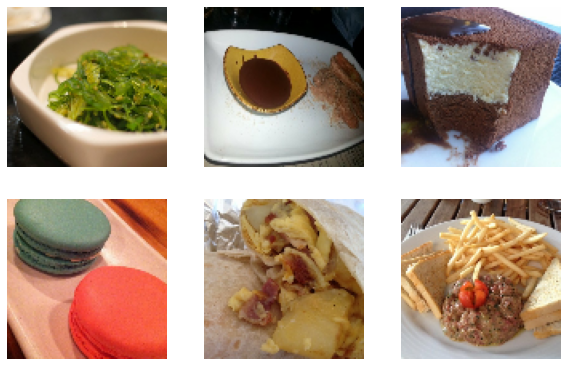

In [5]:
# plotting a sample of the images
plt.figure(figsize=(10,10))

for image , label in train_df.take(1):
    for i in range(6):
        ax = plt.subplot(3 ,3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')

## Convert images png to jpeg format 

## Define the model architecture

In [8]:
# The model will be a multi layer Conv2D and Maxpooling with Dropouts to help prevent overfitting , towrds the end 1 Dens layer will be there before our final output
model = Sequential()
#layer 1,2,3 sequence 
model.add(Conv2D(filters= 2, kernel_size=(3,3),activation='relu',input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.2))
#layer 4,5,6 sequence 
model.add(Conv2D(filters= 4, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.2))

#Dense Network
model.add(Flatten())
model.add(Dense(3000,activation='relu'))
model.add(Dense(1500,activation='relu'))
model.add(Dense(500,activation='relu'))
#output layer with 148 classifications 
model.add(Dense(148,activation='softmax'))

# compile the model using the adam optimizer and categorical crossentropy for loss as we are using one-hot encoding style catagories
model.compile(optimizer='adam' , 
              loss='categorical_crossentropy' ,
              metrics=[
                    'accuracy',
                    tf.keras.metrics.TruePositives(name="tp"),
                    tf.keras.metrics.TrueNegatives(name="tn"),
                    tf.keras.metrics.FalsePositives(name="fp"),
                    tf.keras.metrics.FalseNegatives(name="fn"),
                    tf.keras.metrics.Precision(name="precision"),
                    tf.keras.metrics.Recall(name="recall"),
                    tf.keras.metrics.AUC(name="auc"),
                    ]
            )


# printing out a summary of the model 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 2)         56        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 2)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 4)         76        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 4)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2116)              0         
                                                                 
 dense_2 (Dense)             (None, 3000)             

In [9]:
# Fitting the model with our traning dataset
history = model.fit(train_df , epochs=100 , batch_size=1 , validation_data=val_df , verbose=1)

Epoch 1/100
2852/2852 [==============================] - 410s 143ms/step - loss: 7.3229 - accuracy: 0.0152 - tp: 7.0000 - tn: 13411045.0000 - fp: 794.0000 - fn: 91230.0000 - precision: 0.0087 - recall: 7.6723e-05 - auc: 0.6488 - val_loss: 4.6806 - val_accuracy: 0.0185 - val_tp: 0.0000e+00 - val_tn: 1669626.0000 - val_fp: 0.0000e+00 - val_fn: 11358.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6900
Epoch 2/100
2852/2852 [==============================] - 435s 152ms/step - loss: 4.6399 - accuracy: 0.0236 - tp: 6.0000 - tn: 13411830.0000 - fp: 9.0000 - fn: 91231.0000 - precision: 0.4000 - recall: 6.5763e-05 - auc: 0.7070 - val_loss: 4.6184 - val_accuracy: 0.0242 - val_tp: 0.0000e+00 - val_tn: 1669626.0000 - val_fp: 0.0000e+00 - val_fn: 11358.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7167
Epoch 3/100
2852/2852 [==============================] - 393s 138ms/step - loss: 4.5565 - accuracy: 0.0309 - tp: 20.0000 - tn: 13411811.0000 - fp: 28.

In [29]:
#save the model for reuse and comparing 
model.save('model4')
#saving the traning history of the latest model 
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

NameError: name 'model' is not defined

## loading previous models to use

In [ ]:
model1 = keras.models.load_model('model1')
model1.predict()

In [ ]:
# evaluate the model 
model.evaluate(test_df)

#make predictions 
predictions = model.predict(test_df)

#creating callbacks for tensorflow summary 
jaccard_score(test_df,predictions)

357/357 [==============================] - 25s 69ms/step - loss: 7.7206 - accuracy: 0.0130 - tp: 26.0000 - tn: 1676850.0000 - fp: 1155.0000 - fn: 11389.0000 - precision: 0.0220 - recall: 0.0023 - auc: 0.6043


ValueError: Found input variables with inconsistent numbers of samples: [357, 11415]

## Model performance metrics and evaluation 

In [ ]:
tf.summary()

## Predictions and Inferences on new Data

In [ ]:
model.predict(val_df)

In [43]:
import json
import spoonacular as sp
import random
words = ['onions' , 'steak' , 'garlic' , 'lemons' , 'parcley']
api = sp.API("73d3d61221c4417abdd341e716cf62ce")
recipes = api.search_recipes_by_ingredients(words).json()
random = random.randint(0,len(recipes))
output = recipes[random -1]

In [44]:
output['id']

{'id': 644758,
 'title': 'Glazed Pearl Onions',
 'image': 'https://spoonacular.com/recipeImages/644758-312x231.jpg',
 'imageType': 'jpg',
 'usedIngredientCount': 1,
 'missedIngredientCount': 2,
 'missedIngredients': [{'id': 19296,
   'amount': 1.0,
   'unit': 'Tsp',
   'unitLong': 'Tsp',
   'unitShort': 'tsp',
   'aisle': 'Nut butters, Jams, and Honey',
   'name': 'honey',
   'original': '1 Tsp. honey',
   'originalName': 'honey',
   'meta': [],
   'image': 'https://spoonacular.com/cdn/ingredients_100x100/honey.png'},
  {'id': 1022068,
   'amount': 2.0,
   'unit': 'Tbsp',
   'unitLong': 'Tbsps',
   'unitShort': 'Tbsp',
   'aisle': 'Oil, Vinegar, Salad Dressing',
   'name': 'red wine vinegar',
   'original': '2 Tbsp. red wine vinegar',
   'originalName': 'red wine vinegar',
   'meta': ['red'],
   'image': 'https://spoonacular.com/cdn/ingredients_100x100/red-wine-vinegar.jpg'}],
 'usedIngredients': [{'id': 10411282,
   'amount': 1.0,
   'unit': 'cup',
   'unitLong': 'cup',
   'unitShort'

In [41]:
from bs4 import BeautifulSoup
import random
import requests as rq 
import json
from recipe_scrapers import scrape_me

ingredients = ['onions' , 'steak' , 'garlic' , 'lemons' , 'parcley']

sentence = "&IngIncl="
http_start = 'https://www.allrecipes.com/search/results/?search='

ingredients = [sentence + i  for i in ingredients]
ingredients = "".join(ingredients)
ingredients
url = http_start + ingredients

request = rq.get(url)

soup = BeautifulSoup(request.text , 'html.parser')

recipes = []

for a in soup.find_all('a', href=True):
    recipes.append(a['href'])

recipes_df  = pd.DataFrame(recipes)
recipes_df.columns = ['url']
recipes_df = recipes_df.loc[recipes_df['url'].str.contains('/recipe/') ]
recipes_df.reset_index(inplace=True)

random = random.randint(0,len(recipes_df))
scrape = scrape_me(recipes_df['url'][random]) 
title = scrape.title()
instructions = scrape.instructions()


print(f'You can make ** {title} ** with you list provided and here is how to make it: \n{instructions}')

You can make ** Round Steak and Gravy ** with you list provided and here is how to make it: 
Preheat oven to 325 degrees F (165 degrees C).
Combine flour, paprika, onion powder, and garlic powder in a resealable plastic bag; shake to mix. Add beef a few pieces at a time and shake to coat.
Heat oil in a Dutch oven over medium-high heat. Add beef and brown on both sides, 5 to 7 minutes. Transfer beef to a baking pan and keep warm.
Saute onion in the beef drippings in the Dutch oven; cook until tender, about 5 minutes. Stir in cream of chicken soup, beef broth, water, and pepper. Bring gravy to a boil. Remove from heat.
Pour gravy over beef in the baking pan. Cover with aluminum foil.
Bake in the preheated oven until tender, about 2 hours.


In [28]:
ingredients = ['onions' , 'steak' , 'garlic' , 'lemons' , 'parcley']

sentence = "&IngIncl="
http_start = 'https://www.allrecipes.com/search/results/?search='

ingredients = [sentence + i  for i in ingredients]
ingredients = "".join(ingredients)
ingredients
url = http_start + ingredients

url


'https://www.allrecipes.com/search/results/?search=&IngIncl=onions&IngIncl=steak&IngIncl=garlic&IngIncl=lemons&IngIncl=parcley'

In [19]:
import re
recipes_df['url'].str.findall(re.compile(r'/recipe/'))


0      []
1      []
2      []
3      []
4      []
       ..
424    []
425    []
426    []
427    []
428    []
Name: url, Length: 429, dtype: object

In [4]:
scrape = scrape_me('https://www.allrecipes.com/recipe/12123/apple-cranberry-and-pear-crisp/')

In [10]:
scrape.ingredients()

['2 Rome Beauty apples - peeled, cored, and cubed',
 '2 Comice pears - peeled, cored, and cubed',
 '½ cup dried cranberries',
 '1 tablespoon all-purpose flour',
 '2 tablespoons honey',
 '1 ½ tablespoons lemon juice',
 '½ cup all-purpose flour',
 '½ cup packed brown sugar',
 '½ cup quick cooking oats',
 '¼ cup ground walnuts',
 '½ cup butter']

In [3]:
for i in recipes_df['url']:
    try:
        scrape = scrape_me(i)
    except:
        print(f'could not scrape:{i}')
        pass


could not scrape:#main-content
could not scrape:/
could not scrape:/
could not scrape:#
could not scrape:/account/signup?regSource=3907&returnURL=%2F
could not scrape:https://x.specialoffers.meredith.com/ats/show.aspx?cr=588&fm=293&regSource=3700
could not scrape:https://websupport.meredith.com/
could not scrape:/account/signin?returnURL=https://www.allrecipes.com/my/shopping-lists/&regSource=3906&context_action=View%20Shopping%20List&custom_dek=Sign%20up%20to%20view%20your%20account%27s%20shopping%20list.
could not scrape:https://dish.allrecipes.com/ask-the-community/
could not scrape:/account/profile
could not scrape:/account/profile#/collections
could not scrape:https://websupport.meredith.com/
could not scrape:/account/signout
could not scrape:https://dish.allrecipes.com/ask-the-community/
could not scrape:/account/signin?regSource=3907&returnURL=%2F
could not scrape:https://www.magazine.store/allrecipes-magazine/?utm_source=allrecipes.com&utm_medium=owned&utm_campaign=i910arr1w181

In [113]:
test

0                                         #main-content
1                                                     /
2                                                     /
3                                                     #
4             https://www.allrecipes.com/account/signin
                             ...                       
425                https://www.meredith.com/nmg/privacy
426                https://www.meredith.com/legal/terms
427                  https://www.meredith.com/adchoices
428                                  javascript:void(0)
429    https://www.meredith.com/legal/web-accessibility
Name: url, Length: 430, dtype: object